# MNIST Database

* Find this notebook at `EpyNN/epynnlive/captcha_mnist/prepare_dataset.ipynb`. 
* Regular python code at `EpyNN/epynnlive/captcha_mnist/prepare_dataset.py`.

Run the notebook online with [Google Colab](https://colab.research.google.com/github/Synthaze/EpyNN/blob/main/epynnlive/captcha_mnist/prepare_dataset.ipynb).

**Level: Advanced**

This notebook is part of the series on preparing data for Neural Network regression with EpyNN. 

It deals with a real world problem and therefore will focus on the problem itself, rather than basics that were reviewed along with the preparation of the following dummy dataset: 

* [Boolean dataset](../dummy_boolean/prepare_dataset.ipynb)
* [String dataset](../dummy_string/prepare_dataset.ipynb)
* [Time-series (numerical)](../dummy_time/prepare_dataset.ipynb)
* [Image (numerical)](../dummy_image/prepare_dataset.ipynb)

## Recognition of hand-written digits

There are numerous applications of [Handwritten Digit Recognition using Machine and Deep Learning Algorithms](https://arxiv.org/pdf/2106.12614.pdf). Among those we may cite postal mail sorting, bank check processing or text extraction.

There were also consequences that arose from the capability of ANNs to overperform at recognizing hand-written digits: the widely spread re-Captcha standard that replaced the digit based or noisy-digit based captcha. Indeed, such controls were put in place to prevent non-human (bots) from requesting internet pages or brute force sign-in interfaces. The [MNIST Database](http://yann.lecun.com/exdb/mnist/) may be seen as a benchmark dataset to bypass first generation captcha made of simple hand-written digits in a row.

## Prepare a set of hand-written digits as images

MNIST data retrieved below are mirrored from the official web-page of the database.

### Imports

In [1]:
# EpyNN/epynnlive/captcha_mnist/prepare_dataset.ipynb
# Install dependencies
!pip3 install --upgrade-strategy only-if-needed epynn

# Standard library imports
import tarfile
import random
import gzip
import os

# Related third party imports
import wget
import numpy as np
import matplotlib.pyplot as plt

# Local application/library specific imports
from epynn.commons.logs import process_logs

Note the `tarfile` and `gzip` which are Python built-in *standard* libraries the first choices to deal with `.tar` and `.gz` archives, respectively.

### Seeding

In [2]:
random.seed(1)

For reproducibility.

### Download MNIST database

Simple function to download data from the cloud as `.tar` archive. Once uncompressed, it yields a `data/` directory containing `.gz` archives for features and label and for both training and testing sets.

In [3]:
def download_mnist():
    """Download a subset of the MNIST database.
    """
    data_path = os.path.join('.', 'data')

    if not os.path.exists(data_path):

        # Download @url with wget
        url = 'https://synthase.s3.us-west-2.amazonaws.com/mnist_database.tar'
        fname = wget.download(url)

        # Extract archive
        tar = tarfile.open(fname).extractall('.')
        process_logs('Make: '+fname, level=1)

        # Clean-up
        os.remove(fname)

    return None

Retrieve the data as follows.

In [4]:
download_mnist()

Make: mnist_database.tar


In [5]:
for path in os.walk('data'):
    print(path)

('data', [], ['train-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz'])


You may have noted the `idx3-ubyte` and `idx1-ubyte` in file names. This refers to the *IDX* file format which is a *"simple format for vectors and multidimensional matrices of various numerical types"*.

Directly sourced from [MNIST web-page](http://yann.lecun.com/exdb/mnist/) the files content is as follow:

In [6]:
# TRAINING SET IMAGE FILE (train-images-idx3-ubyte)

# [offset] [type]          [value]          [description]
# 0000     32 bit integer  0x00000803(2051) magic number
# 0004     32 bit integer  60000            number of images
# 0008     32 bit integer  28               number of rows
# 0012     32 bit integer  28               number of columns
# 0016     unsigned byte   ??               pixel
# 0017     unsigned byte   ??               pixel
# ........
# xxxx     unsigned byte   ??               pixel

If we try to match this to our actual `train-images-idx3-ubyte.gz` archive:

In [7]:
img_file = gzip.open('data/train-images-idx3-ubyte.gz')

header = img_file.read(16)  # Read the first 16 bytes

print(header)               # As bytes
print(list(header))         # As integers
print(len(list(header)))    # 16 integers over 16 bytes

print(header[8:12])         # Number of rows
print(list(header[8:12]))   # To integers

image_size = int.from_bytes(header[8:12], byteorder='big')
print(image_size)

sample_1_bytes = img_file.read(image_size * image_size * 1)
sample_1 = np.frombuffer(sample_1_bytes, dtype=np.uint8).astype(np.float32)

np.set_printoptions(linewidth=np.inf)  # Disable line wrapping on array print

print(sample_1.reshape(image_size, image_size))    # Reshape 1D array into 2D

b'\x00\x00\x08\x03\x00\x00\xea`\x00\x00\x00\x1c\x00\x00\x00\x1c'
[0, 0, 8, 3, 0, 0, 234, 96, 0, 0, 0, 28, 0, 0, 0, 28]
16
b'\x00\x00\x00\x1c'
[0, 0, 0, 28]
28
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.

Similar logic applies for labels. We got a *5* here in case.

### Prepare dataset

Below is a function we use to prepare the labeled dataset.

In [8]:
def prepare_dataset(N_SAMPLES=100):
    """Prepare a dataset of hand-written digits as images.

    :param N_SAMPLES: Number of MNIST samples to retrieve, defaults to 100.
    :type N_SAMPLES: int

    :return: Set of sample features.
    :rtype: tuple[:class:`numpy.ndarray`]

    :return: Set of single-digit sample label.
    :rtype: tuple[:class:`numpy.ndarray`]
    """
    # Process MNIST images
    img_file = gzip.open('data/train-images-idx3-ubyte.gz')

    header = img_file.read(16)
    image_size = int.from_bytes(header[8:12], byteorder='big')
    buf = img_file.read(image_size * image_size * N_SAMPLES)
    X_features = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    X_features = X_features.reshape(N_SAMPLES, image_size, image_size, 1)

    # Process MNIST labels
    label_file = gzip.open('data/train-labels-idx1-ubyte.gz')

    header = label_file.read(8)
    buf = label_file.read(image_size * image_size * N_SAMPLES)
    Y_label = np.frombuffer(buf, dtype=np.uint8)

    # Prepare X-Y pairwise dataset
    dataset = list(zip(X_features, Y_label))

    # Shuffle dataset
    random.shuffle(dataset)

    # Separate X-Y pairs
    X_features, Y_label = zip(*dataset)

    return X_features, Y_label

Let's check the function.

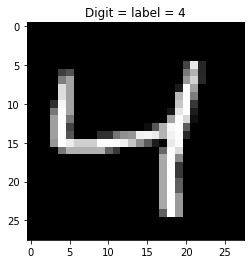

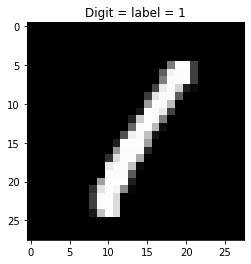

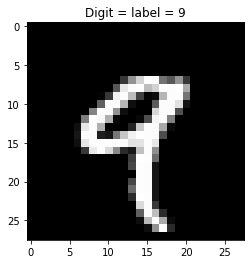

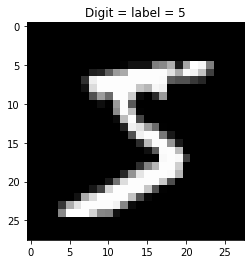

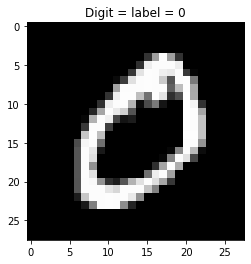

In [9]:
X_features, Y_label = prepare_dataset(N_SAMPLES=5)

for features, label in zip(X_features, Y_label):
    plt.imshow(features, cmap='gray')
    plt.title('Digit = label = %s' % label)
    plt.show()

We are ready to proceed with the training of a network based on those data.

## Live examples

The function ``prepare_dataset()`` presented herein is used in the following live examples:

* Notebook at`EpyNN/epynnlive/captcha_mnist/train.ipynb` or following [this link](train.ipynb). 
* Regular python code at `EpyNN/epynnlive/captcha_mnist/train.py`.